In [59]:
import pandas as pd

# Load the datasets
customer_data_path = "../data/customer_data_collection.csv"
product_data_path = "../data/product_recommendation_data.csv"

# Read the datasets
customer_df = pd.read_csv(customer_data_path)
product_df = pd.read_csv(product_data_path)

# Display basic information about the datasets
customer_info = customer_df.info(), customer_df.head(), customer_df.describe()
product_info = product_df.info(), product_df.head(), product_df.describe()

customer_info, product_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       10000 non-null  object 
 1   Age               10000 non-null  int64  
 2   Gender            10000 non-null  object 
 3   Location          10000 non-null  object 
 4   Browsing_History  10000 non-null  object 
 5   Purchase_History  10000 non-null  object 
 6   Customer_Segment  10000 non-null  object 
 7   Avg_Order_Value   10000 non-null  float64
 8   Holiday           10000 non-null  object 
 9   Season            10000 non-null  object 
 10  Unnamed: 10       0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 859.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              ---

((None,
    Customer_ID  Age  Gender   Location                 Browsing_History  \
  0       C1000   28  Female    Chennai             ['Books', 'Fashion']   
  1       C1001   27    Male      Delhi  ['Books', 'Fitness', 'Fashion']   
  2       C1002   34   Other    Chennai                  ['Electronics']   
  3       C1003   23    Male  Bangalore                   ['Home Decor']   
  4       C1004   24   Other    Kolkata        ['Fashion', 'Home Decor']   
  
                                 Purchase_History    Customer_Segment  \
  0                        ['Biography', 'Jeans']         New Visitor   
  1  ['Biography', 'Resistance Bands', 'T-shirt']  Occasional Shopper   
  2                                ['Smartphone']  Occasional Shopper   
  3                                  ['Wall Art']      Frequent Buyer   
  4                             ['Shoes', 'Lamp']      Frequent Buyer   
  
     Avg_Order_Value Holiday  Season  Unnamed: 10  
  0          4806.99      No  Winter    

In [60]:
# Drop empty columns
customer_df = customer_df.drop(columns=['Unnamed: 10'])
product_df = product_df.drop(columns=['Unnamed: 13', 'Unnamed: 14'])

# Convert list-like string columns into actual lists for better analysis
import ast

list_columns = ['Browsing_History', 'Purchase_History']
for col in list_columns:
    customer_df[col] = customer_df[col].apply(ast.literal_eval)

# Display cleaned data information
customer_df.info(), product_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       10000 non-null  object 
 1   Age               10000 non-null  int64  
 2   Gender            10000 non-null  object 
 3   Location          10000 non-null  object 
 4   Browsing_History  10000 non-null  object 
 5   Purchase_History  10000 non-null  object 
 6   Customer_Segment  10000 non-null  object 
 7   Avg_Order_Value   10000 non-null  float64
 8   Holiday           10000 non-null  object 
 9   Season            10000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 781.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Product_ID           

(None, None)

In [61]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
categorical_columns = ['Gender', 'Location', 'Holiday', 'Season']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    customer_df[col] = le.fit_transform(customer_df[col])
    label_encoders[col] = le  # Store encoders for reference

# Normalize numerical features
scaler = StandardScaler()
customer_df[['Age', 'Avg_Order_Value']] = scaler.fit_transform(customer_df[['Age', 'Avg_Order_Value']])

# Display processed data
customer_df.head()


,Customer_ID,Age,Gender,Location,Browsing_History,Purchase_History,Customer_Segment,Avg_Order_Value,Holiday,Season
0,C1000,-0.901703,0,1,"[Books, Fashion]","[Biography, Jeans]",New Visitor,1.585742,0,3
1,C1001,-0.982530,1,2,"[Books, Fitness, Fashion]","[Biography, Resistance Bands, T-shirt]",Occasional Shopper,-1.510162,1,0
2,C1002,-0.416743,2,1,[Electronics],[Smartphone],Occasional Shopper,-0.779067,1,2
3,C1003,-1.305837,1,0,[Home Decor],[Wall Art],Frequent Buyer,-0.562452,0,0
4,C1004,-1.225010,2,3,"[Fashion, Home Decor]","[Shoes, Lamp]",Frequent Buyer,-1.510370,0,3


# Extract Most Frequent Categories

In [62]:
from collections import Counter

def most_frequent_category(history_list):
    if not history_list:
        return "Unknown"
    category_counts = Counter(history_list)
    return category_counts.most_common(1)[0][0]

customer_df['Top_Browsing_Category'] = customer_df['Browsing_History'].apply(most_frequent_category)
customer_df['Top_Purchase_Category'] = customer_df['Purchase_History'].apply(most_frequent_category)


# Encode These New Categorical Features

In [63]:
from sklearn.preprocessing import LabelEncoder

for col in ['Top_Browsing_Category', 'Top_Purchase_Category']:
    le = LabelEncoder()
    customer_df[col] = le.fit_transform(customer_df[col])


# Drop the Original List-Based Columns

In [64]:
customer_df = customer_df.drop(columns=['Browsing_History', 'Purchase_History'])


# Steps to Find Optimal k for K-Means

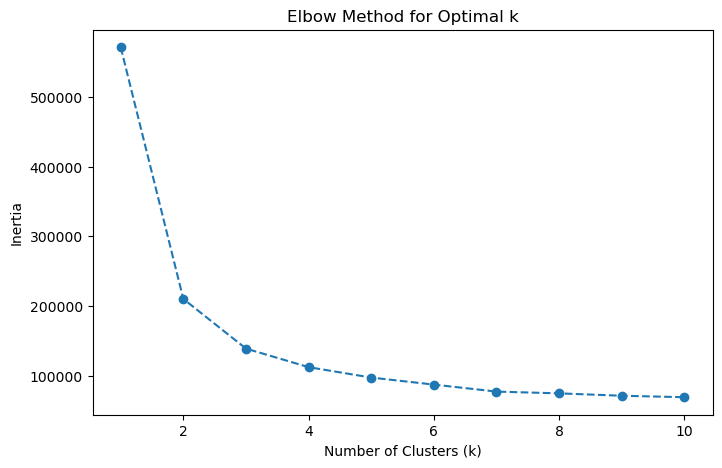

In [65]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select features for clustering
features = ['Age', 'Gender', 'Location', 'Avg_Order_Value', 'Holiday', 'Season', 'Top_Browsing_Category', 'Top_Purchase_Category']

# Elbow method to determine optimal k
inertia = []
K_range = range(1, 11)  # Testing k from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(customer_df[features])
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [66]:
# Set optimal number of clusters (replace k_optimal with the number you found)
k_optimal = 4  # Example value, update this based on your elbow method

# Drop existing 'Cluster' column if it exists
if 'Cluster' in customer_df.columns:
	customer_df = customer_df.drop(columns=['Cluster'])

# Train K-Means model
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
customer_df['Cluster'] = kmeans.fit_predict(customer_df[features])

# Analyze cluster characteristics
cluster_summary = customer_df.groupby('Cluster').mean(numeric_only=True)

# Display cluster summary
print(cluster_summary)


              Age    Gender  Location  Avg_Order_Value   Holiday    Season  \
Cluster                                                                      
0        0.007013  1.013732  1.947523        -0.007081  0.504659  1.501226   
1       -0.015827  1.018735  2.016862        -0.018876  0.496956  1.498829   
2        0.008520  1.023873  2.014026         0.016198  0.504625  1.480454   
3       -0.003661  1.008889  1.992323         0.000185  0.485657  1.464646   

         Top_Browsing_Category  Top_Purchase_Category  
Cluster                                                
0                     0.595880              12.923492  
1                     3.206557               1.993911  
2                     3.378096              19.449120  
3                     2.346263               7.538182  


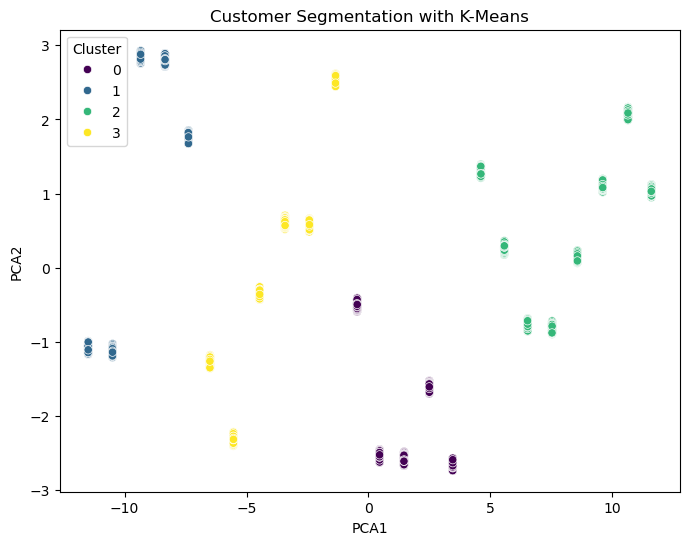

In [67]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensionality to 2 components
pca = PCA(n_components=2)
customer_df['PCA1'], customer_df['PCA2'] = pca.fit_transform(customer_df[features])[:, 0], pca.fit_transform(customer_df[features])[:, 1]

# Plot the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_df, palette='viridis')
plt.title('Customer Segmentation with K-Means')
plt.show()


# 1. Understanding Customer Segments

In [68]:
# Analyze customer segments
cluster_summary = customer_df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)


              Age    Gender  Location  Avg_Order_Value   Holiday    Season  \
Cluster                                                                      
0        0.007013  1.013732  1.947523        -0.007081  0.504659  1.501226   
1       -0.015827  1.018735  2.016862        -0.018876  0.496956  1.498829   
2        0.008520  1.023873  2.014026         0.016198  0.504625  1.480454   
3       -0.003661  1.008889  1.992323         0.000185  0.485657  1.464646   

         Top_Browsing_Category  Top_Purchase_Category      PCA1      PCA2  
Cluster                                                                    
0                     0.595880              12.923492  1.404716 -1.978772  
1                     3.206557               1.993911 -9.416670  1.049509  
2                     3.378096              19.449120  8.032310  0.551670  
3                     2.346263               7.538182 -3.909453 -0.022074  


# 3. Using Clusters for Product Recommendations

In [69]:
# Merge customer clusters with product data
customer_products = customer_df[['Cluster']].merge(product_df, left_index=True, right_index=True)

# Find most purchased product categories per cluster
top_products_per_cluster = customer_products.groupby('Cluster')['Category'].value_counts().unstack().fillna(0)

# Display top products per cluster
print(top_products_per_cluster)


Category  Beauty  Books  Electronics  Fashion  Fitness  Home Decor
Cluster                                                           
0            352    353          329      307      350         348
1            369    407          345      335      345         334
2            542    569          538      578      547         577
3            405    418          411      400      415         426


# Building a Product Recommendation System Based on Customer Segments

# Step 1: Identify Top Products for Each Customer Segment

In [70]:
# Merge customer clusters with product data
customer_products = customer_df[['Cluster']].merge(product_df, left_index=True, right_index=True)

# Find most purchased product categories per cluster
top_products_per_cluster = customer_products.groupby('Cluster')['Category'].value_counts().unstack().fillna(0)

# Display top products per cluster
print(top_products_per_cluster)


Category  Beauty  Books  Electronics  Fashion  Fitness  Home Decor
Cluster                                                           
0            352    353          329      307      350         348
1            369    407          345      335      345         334
2            542    569          538      578      547         577
3            405    418          411      400      415         426


# Step 2: Implement a Rule-Based Recommendation System

In [71]:
def recommend_products(customer_cluster, num_recommendations=5):
    # Get top categories for this cluster
    top_categories = top_products_per_cluster.loc[customer_cluster].sort_values(ascending=False)
    
    # Get product recommendations from these categories
    recommended_products = product_df[product_df['Category'].isin(top_categories.index)].head(num_recommendations)
    
    return recommended_products[['Category', 'Subcategory', 'Brand', 'Price', 'Product_Rating']]

# Example: Recommend products for customers in Cluster 1
print(recommend_products(customer_cluster=1))


      Category Subcategory    Brand  Price  Product_Rating
0      Fashion       Jeans  Brand B   1713             2.3
1       Beauty    Lipstick  Brand C   1232             2.1
2  Electronics      Laptop  Brand B   4833             2.4
3        Books      Comics  Brand D   4902             4.2
4   Home Decor    Cushions  Brand C    856             3.3


# Building a Machine Learning-Based Product Recommendation System

# Step 1: Choose the Recommendation Approach

In [72]:
def recommend_products(customer_cluster, num_recommendations=5):
    # Get top categories for this cluster
    top_categories = top_products_per_cluster.loc[customer_cluster].sort_values(ascending=False)
    
    # Get product recommendations from these categories
    recommended_products = product_df[product_df['Category'].isin(top_categories.index)].head(num_recommendations)
    
    return recommended_products[['Category', 'Subcategory', 'Brand', 'Price', 'Product_Rating']]

# Example: Recommend products for customers in Cluster 1
print(recommend_products(customer_cluster=1))


      Category Subcategory    Brand  Price  Product_Rating
0      Fashion       Jeans  Brand B   1713             2.3
1       Beauty    Lipstick  Brand C   1232             2.1
2  Electronics      Laptop  Brand B   4833             2.4
3        Books      Comics  Brand D   4902             4.2
4   Home Decor    Cushions  Brand C    856             3.3


# Step 2: Prepare Data for Model Training

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine product features into a single text column
product_df["combined_features"] = product_df["Category"] + " " + product_df["Subcategory"] + " " + product_df["Brand"]

# Convert text to numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")
product_vectors = vectorizer.fit_transform(product_df["combined_features"])

# Compute similarity between products
product_similarity = cosine_similarity(product_vectors)

# Function to recommend similar products
def recommend_products_content_based(product_id, num_recommendations=5):
    if product_id not in product_df["Product_ID"].values:
        return []
    
    idx = product_df[product_df["Product_ID"] == product_id].index[0]
    similar_products = sorted(enumerate(product_similarity[idx]), key=lambda x: x[1], reverse=True)[1:num_recommendations+1]
    
    return [product_df.iloc[i[0]]["Product_ID"] for i in similar_products]

# Example usage
print(recommend_products_content_based(product_id='P2027'))


['P2035', 'P2067', 'P2090', 'P2115', 'P2131']


# Step 5: Build a Hybrid Recommendation Model

In [ ]:
def hybrid_recommend(customer_id, product_id, num_recommendations=5):
    collab_recs = recommend_products_content_based(customer_id, num_recommendations)
    content_recs = recommend_products_content_based(product_id, num_recommendations)

    # Merge both recommendations
    final_recs = list(set(collab_recs + content_recs))[:num_recommendations]

    return final_recs

# Example: Recommend products using hybrid model
print(hybrid_recommend(customer_id='C1018y', product_id='P2024'))


['P2180', 'P2024', 'P2174', 'P2025', 'P2173']
